# NetworkX basics

__Learning goals:__
        
+ creating and populating different types of graphs with NetworkX
+ visualizing graphs with NetworkX 

## Loading the modules

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx 
import pandas as pd

## Example A: Creating a one-mode, undirected, unweighted network

We are going to manipulate the graph with the following underlying adjancency matrix:

\begin{equation}
A = 
 \begin{pmatrix}
  0 & 1 & 0 & 1\\
  1 & 0 & 0 & 1\\
  0 & 0 & 0 & 1\\
  1 & 1 & 1 & 0\\
 \end{pmatrix}
\end{equation}

### Step 1: Create an empty graph of the desired class

__Note:__ NetworkX provides us with classes to create several types of graphs.
The most common classes are:

- `nx.Graph` is the class for undirected graphs
- `nx.DiGraph` is the class for directed graphs

There are not classes for creating two-mode graphs (which are undirected graphs with two types of nodes). Also, there are not classes for weighted graphs. In fact, weighted graphs are particualr graphs whose edges have an attribute (see Example B)

In [14]:
# initialize a new graph object
G = nx.Graph()
# check the type of the object G
# G?                              # uncommented if wanted


### Step 2: Populate the graph with nodes and edges

__Note:__ in NetworkX, there are two options to add nodes and edges to a graph:

+ `.add_node()` and `.add_edge()` are methods that add one node or edge at a time (hence, they requirie to pass a number or string as an argument)
+ `add_nodes_from_` and `add_edges_from_` are methods that add multiple nodes or edges at a time (hence, they require to pass an iterable object as an argument)

The example below shows how to add nodes and edges to a graph using the latter option. Edges are passede as a list of tuples, where each tuple is an edge.

The outcome of code introspection (see the final line of code included in the below-displayed box) indicates the `G` has 4 nodes and 4 edges now. 

In [15]:
# define the set of nodes
node_list = [0, 1, 2, 3]
# populate the graph with nodes
G.add_nodes_from(node_list)
# define the set of edges
edge_list = [(0, 1), (0, 3), (1, 3), (2, 3)]
# populate the graph with edges
G.add_edges_from(edge_list)
# check the graph 
# G?                 # uncomment if wanted

### Step 3: Graph visualization

__Note__: NetworkX provides us with a method to visualize graphs. The method is called `nx.draw()` and draws upon Matplolib. This is visible from the code displayed in the following cell (see .`plt.show()` and the way we pass the drawing options to `nx.draw()`).

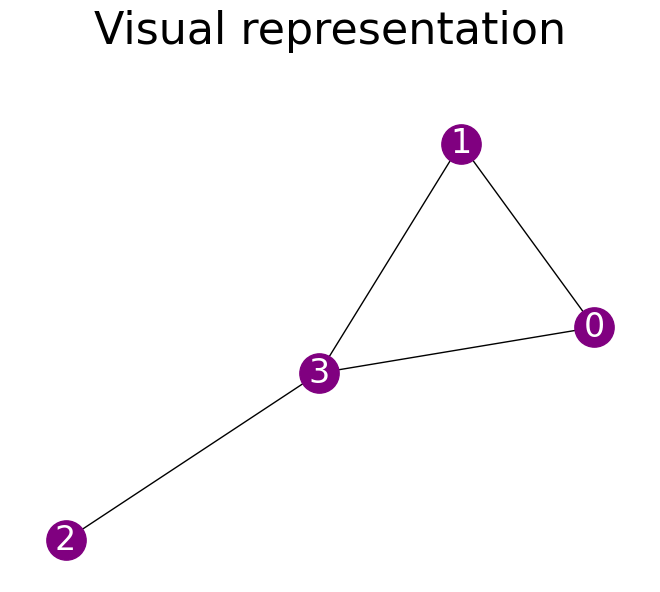

In [16]:
# fix the drawing options
options = {'node_color': 'purple',
           'alpha': 1,
           'node_size': 800,
           'width': 1,
           'with_labels': True,
           'font_size': 24,
           'font_color': 'white'}
# draw the network
nx.draw(G, **options)
# add  title to the network
plt.title('Visual representation\n', fontsize=32)
# show the plot
plt.show()

## Example B: Creating a one-mode, undirected, weighted graph

An example of a weighted network is a 'communication' network showing 
the extent to which to two individuals exchange emails. In this example, 
we are manipulating the following graph:

\begin{equation}
A = 
 \begin{pmatrix}
  0 & 3 & 0 & 2 \\
  3 & 0 & 1 & 0 \\
  0 & 1 & 0 & 3 \\
  2 & 0 & 3 & 0 \\
 \end{pmatrix}
\end{equation}

### Step 1: Create an empty graph of the desired class

In [17]:
# initialize the graph
G = nx.Graph()

### Step 2: Populate the graph with nodes and edges

__Note:__ The main difference with respect to Example A regards the way 
we pass the edges to the `add_edges_from_` method. In this case, the tuple 
associated with an adge contains three elements: the two nodes and the 
attribute of the edge encoded as a dictionary. 

In [18]:
# define the set of nodes
node_list = [0, 1, 2, 3]
# populate the graph with nodes
G.add_nodes_from(node_list)
# define the set of edges
edge_list = [(0, 1, {'w': 3}),
             (0, 3, {'w': 2}),
             (1, 2, {'w': 1}),
             (2, 3, {'w': 3})]
# populate the graph with edges
G.add_edges_from(edge_list)

### Step 3: Graph visualization

__Notes:__ In this visualization, we want to display the weight of each edge.
To do that, we draw the network in two steps:

+ first, we the edge labels (see `nx.draw_networkx_edge_labels()`)
+ second, we draw the network (see `nx.draw()`)

The complication is that the edge labels should be displayed close to the 
edge. It is possible to solve this issue by passing the `pos` argument to
`nx.draw_networkx_edge_labels()` and `nx.draw()`. 

NetworkX has many algorithms to create optimal layouts for graphs. In this case,
we use the `nx.spring_layout()` algorithm.

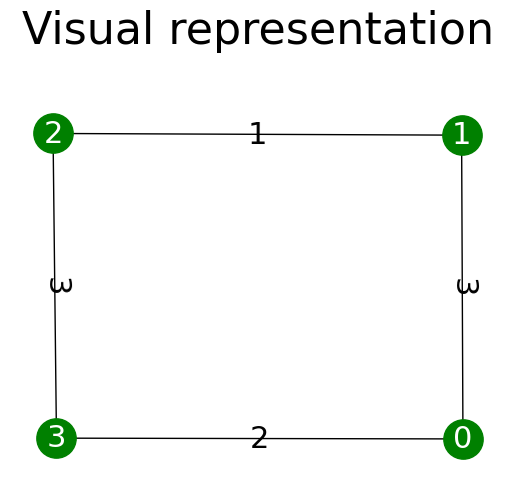

In [19]:
# define labels
edge_labels = dict([((u, v,), d["w"]) for u, v, d in G.edges(data=True)])
# fix drawing options
options = {
    "node_color": "green",
    "alpha": 1,
    "node_size": 800,
    "width": 1,
    "with_labels": True,
    "font_size": 22,
    "font_color": "white",
}
# fix the position of the nodes to improve readability
pos = nx.spring_layout(G)
# draw the network
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=22)
nx.draw(G, pos, **options)
# title of the plot
plt.title("Visual representation\n", fontsize=32)
# show the network
plt.show()

## Example C: Creating a one-mode, directed, weighted graph

An example would be the rivalry among hip-hop artists ― i.e., the extent to 
which artist 'i' perceives artist 'j' as a rival.

Below is the adjacency matrix of the graph we are going to manipulate:

\begin{equation}
A = 
 \begin{pmatrix}
  0 & 3 & 21 & 15 \\
  3 & 0 & 1 & 13 \\
  4 & 8 & 0 & 7 \\
  2 & 0 &19 & 0 \\
 \end{pmatrix}
\end{equation}

### Step 1: Create an empty graph of the desired class

__Note:__ The class for directed graphs is `nx.DiGraph`.

In [20]:
# initialize the graph
G = nx.DiGraph()

### Step 2: Populate the graph with nodes and edges

In [21]:
# define the set of edges
edge_list = [
    (0, 1, 3),
    (0, 2, 21),
    (0, 3, 15),
    (1, 0, 3),
    (1, 2, 1),
    (1, 3, 13),
    (2, 0, 4),
    (2, 1, 8),
    (2, 3, 7),
    (3, 0, 2),
    (3, 2, 19),
]
# populate the graph with edges
G.add_weighted_edges_from(edge_list)
# inspect the edges with their weights
G.edges(data=True)
# check the graph
#G?

OutEdgeDataView([(0, 1, {'weight': 3}), (0, 2, {'weight': 21}), (0, 3, {'weight': 15}), (1, 0, {'weight': 3}), (1, 2, {'weight': 1}), (1, 3, {'weight': 13}), (2, 0, {'weight': 4}), (2, 1, {'weight': 8}), (2, 3, {'weight': 7}), (3, 0, {'weight': 2}), (3, 2, {'weight': 19})])

### Step 3: Graph visualization

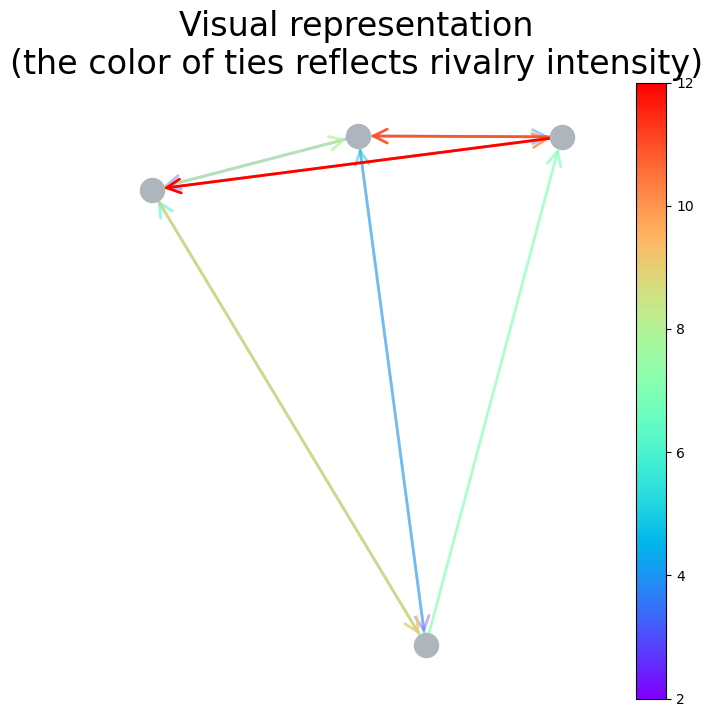

In [22]:
# fix the position of nodes
pos = nx.layout.spring_layout(G)
# create figure
fig = plt.figure(figsize=(8, 8))
# make the color of ties proportional to 'dyadic rivalry'
M = G.number_of_edges()
edge_colors = range(2, M + 2)
# fix transparency to avoid overplotting
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
# draw nodes
nodes = nx.draw_networkx_nodes(G, pos, node_color='#afb5bc')
# draw arrows
edges = nx.draw_networkx_edges(G, pos, arrowstyle='->',
                               arrowsize=25, edge_color=edge_colors,
                               edge_cmap=plt.cm.rainbow, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.rainbow)
pc.set_array(edge_colors)
plt.title("Visual representation\n(the color of ties reflects rivalry intensity)", fontsize=24)
ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

## Example D: A two-mode network

An example of a two-mode network is a set of Spotify users listening to 
songs.

In this exama, we are manipulating the graph with the following incidence matrix:

\begin{equation}
I = 
 \begin{pmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 1 & 1 & 1 \\
 \end{pmatrix}
\end{equation}

### Step 1: Create an empty graph of the desired class

__Note:__ As we know, NetworkX does not provide a class for two-mode graphs.
A two-mode network can be represented as an undirected network. However, 
we are supposed to pass an optional argument to `nx.draw` to declare 
the top and bottom nodes (see Step 2)

In [23]:
G = nx.Graph()

### Step 2: Add nodes and edges to the graph

__Note:__ We pretend to have some data stored in a Pandas DataFrame. We pass 
the nodes in two steps:

+ first, we pass the bottom nodes by fixing the optional argument `bipartite=0`
(the keyword `bipartite` comes from the fact the two-mode networks are also 
known as bipartite networks)
+ second, we pass the top nodes by fixing the optional argument `bipartite=1`

In [24]:
# fake consumption network
df = pd.DataFrame({'user': [0, 1, 2, 2, 2],
                   'song': ['a', 'b', 'b', 'c', 'd']})
# initialize graph
B = nx.Graph()
# add user nodes
users = df['user'].unique()
B.add_nodes_from(users, bipartite=0)
# add song/product nodes
songs = df['song'].unique()
B.add_nodes_from(songs, bipartite=1)
# egdes
edges = list(zip(df.user, df.song))
B.add_edges_from(edges)

### Step 3: Visualize the network

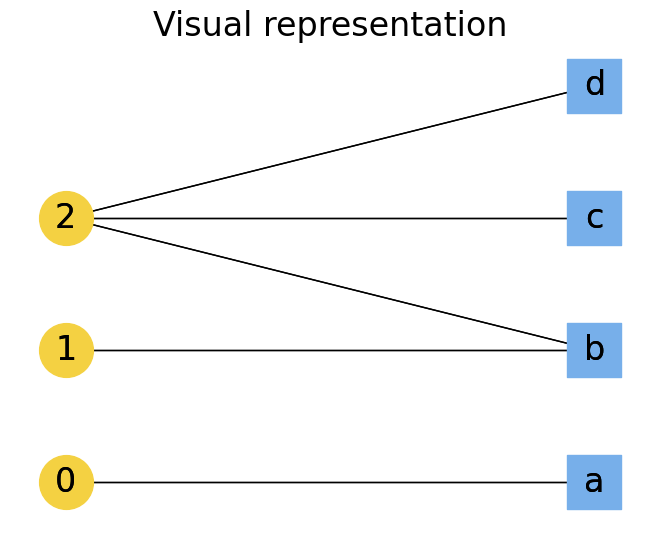

In [27]:
# fix positions for user nodes
pos = {node: [0, i] for i, node in enumerate(users)}
# fix positions for song/product nodes
pos.update({node: [1, i] for i, node in enumerate(songs)})
# draw the network - user nodes
nx.draw(B,
        pos,
        nodelist=list(users),
        node_color='#f4d142',
        with_labels=True,
        node_size=1500,
        font_size=24)
# draw the network - song/product nodes
nx.draw(B,
        pos,
        nodelist=list(songs),
        node_color='#77afea',
        node_shape='s',
        with_labels=True,
        node_size=1500,
        font_size=24)
# title of the plot
plt.title("Visual representation", fontsize=24)
# show the plot
plt.show()